In [ ]:
!pip install tensorflow pandas numpy matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])


In [3]:
# Convert the dataset to a numpy array
dataset = df.values.astype('float32')

# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [4]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


In [5]:
look_back = 12  # Number of previous time steps to use as input features
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


In [8]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert the scaling of the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(np.mean((train_predictions - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test) ** 2))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


1/1 [==============================] - 0s 23ms/step
Train RMSE: 123.12860640204104
Test RMSE: 118.57183317741584


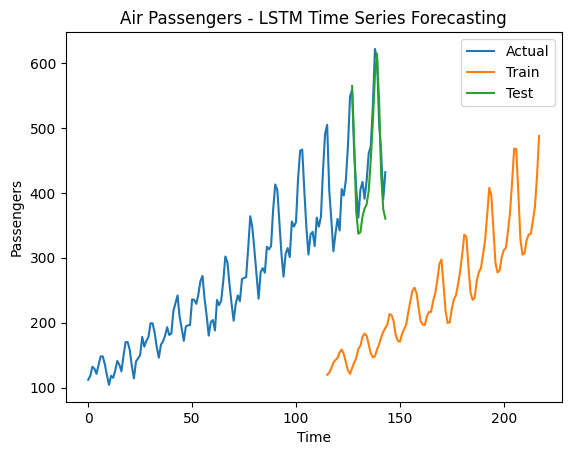

In [9]:
# Plot the actual values and predictions
plt.plot(dataset, label='Actual')
plt.plot([None for _ in range(train_size)] + [x for x in train_predictions.flatten()], label='Train')
plt.plot([None for _ in range(train_size + look_back)] + [x for x in test_predictions.flatten()], label='Test')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Air Passengers - LSTM Time Series Forecasting')
plt.legend()
plt.show()
